In [1]:
!pip install tensorflow tqdm opencv-python

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\pyserial-3.5-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
tf.random.set_seed(3)
import glob 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU


In [3]:
folders_names = []
##'/kaggle/input/leapgestrecog/leapGestRecog/0'
for i in range(1):
    folder = r'./leapGestRecog/0{}'.format(i)
    folders_names.append(folder)

files_names = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']


In [4]:
folders_names

['./leapGestRecog/00']

In [17]:
training_data = []

def create_training_data():
    i = 0
    for folder in folders_names:
        Class_num=i
        print('Class ' ,Class_num)
        for file in files_names:
            path = os.path.join(folder, file)

            print('Class ' ,Class_num,file)
            
            for img in tqdm(os.listdir(path)):
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                training_data.append([img_array,int(Class_num)])
            Class_num=Class_num+1
                        
    
create_training_data()        

Class  0
Class  0 01_palm


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:00<00:00, 422.49it/s]


Class  1 02_l


100%|██████████| 200/200 [00:00<00:00, 330.36it/s]


Class  2 03_fist


100%|██████████| 200/200 [00:00<00:00, 293.58it/s]


Class  3 04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 207.44it/s]


Class  4 05_thumb


100%|██████████| 200/200 [00:01<00:00, 161.77it/s]


Class  5 06_index


100%|██████████| 200/200 [00:00<00:00, 209.34it/s]


Class  6 07_ok


100%|██████████| 200/200 [00:00<00:00, 228.64it/s]


Class  7 08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 208.86it/s]


Class  8 09_c


100%|██████████| 200/200 [00:01<00:00, 195.70it/s]


Class  9 10_down


100%|██████████| 200/200 [00:00<00:00, 224.08it/s]


In [18]:
for folder in folders_names:
    class_num = folder[-1]
    print('Class', class_num)
    for file in files_names:
        path = os.path.join(folder, file)
       
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            print("Image shape:", img_array.shape,"\n")
            break  
        break  


Class 0
Image shape: (240, 640) 



In [19]:
def check_image_sizes():
    first_img_shape = None
    for folder in folders_names:
        for file in files_names:
            path = os.path.join(folder, file)
            for img in os.listdir(path):
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if first_img_shape is None:
                    first_img_shape = img_array.shape
                elif img_array.shape != first_img_shape:
                    print("Image sizes are not consistent.")
                    return False
    print("All images have the same size:", first_img_shape)
   
check_image_sizes()


All images have the same size: (240, 640)


In [20]:
X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)


In [21]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(2000, 240, 640)
(2000,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 240, 640)
(1600,)
(400, 240, 640)
(400,)


In [36]:
print(y_train)

y_test

[4 1 4 ... 4 7 5]


array([9, 1, 6, 4, 6, 6, 4, 8, 0, 6, 0, 6, 5, 2, 1, 1, 3, 0, 8, 9, 3, 8,
       9, 5, 9, 0, 5, 4, 3, 0, 3, 4, 2, 4, 5, 2, 8, 6, 5, 1, 0, 9, 1, 2,
       7, 4, 2, 4, 0, 8, 7, 1, 7, 1, 4, 8, 6, 8, 5, 1, 7, 3, 8, 5, 9, 9,
       4, 7, 0, 7, 7, 1, 6, 5, 3, 1, 8, 3, 1, 9, 0, 4, 7, 7, 8, 7, 8, 2,
       1, 8, 7, 8, 1, 1, 9, 9, 3, 6, 7, 9, 4, 4, 2, 6, 1, 4, 3, 1, 3, 2,
       3, 7, 5, 8, 3, 1, 5, 4, 1, 8, 9, 5, 5, 2, 1, 7, 2, 4, 5, 1, 9, 9,
       3, 2, 4, 6, 9, 9, 8, 7, 6, 1, 8, 4, 7, 2, 3, 6, 1, 0, 8, 4, 3, 5,
       1, 0, 2, 8, 2, 8, 3, 4, 0, 5, 9, 7, 8, 6, 1, 8, 5, 3, 9, 9, 2, 6,
       3, 6, 4, 8, 6, 3, 9, 5, 4, 3, 9, 8, 5, 6, 3, 1, 6, 1, 0, 2, 5, 4,
       3, 7, 9, 2, 0, 3, 2, 1, 7, 6, 5, 0, 8, 0, 1, 0, 3, 9, 5, 1, 2, 6,
       4, 0, 2, 5, 9, 9, 2, 0, 8, 1, 9, 1, 8, 7, 8, 1, 5, 4, 6, 2, 3, 7,
       2, 4, 6, 0, 4, 9, 4, 6, 5, 1, 5, 2, 7, 5, 2, 3, 9, 6, 0, 9, 0, 7,
       5, 7, 1, 0, 1, 5, 6, 9, 2, 8, 9, 9, 3, 2, 7, 1, 9, 7, 3, 6, 6, 0,
       1, 8, 0, 0, 6, 7, 7, 8, 2, 1, 0, 8, 9, 2, 2,

In [24]:
X_train = X_train/255
X_test = X_test/255
print(X_train[0])

[[0.01568627 0.02352941 0.02352941 ... 0.01960784 0.01960784 0.01960784]
 [0.02745098 0.02745098 0.01568627 ... 0.01568627 0.01568627 0.01568627]
 [0.01960784 0.01568627 0.01568627 ... 0.01960784 0.01568627 0.01568627]
 ...
 [0.02352941 0.02352941 0.01960784 ... 0.02352941 0.01960784 0.01568627]
 [0.01960784 0.01568627 0.02352941 ... 0.01960784 0.01568627 0.02745098]
 [0.02745098 0.02352941 0.02352941 ... 0.09803922 0.04705882 0.0627451 ]]


In [25]:

model = Sequential([
    Flatten(input_shape=(240, 640)),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dense(16),
    LeakyReLU(alpha=0.1),
    Dense(10, activation='softmax')
])

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=3, validation_split=0.1, batch_size=32, verbose=2)



Epoch 1/3


45/45 - 12s - loss: 2.4179 - accuracy: 0.6590 - val_loss: 0.0895 - val_accuracy: 0.9812 - 12s/epoch - 257ms/step
Epoch 2/3
45/45 - 5s - loss: 0.0395 - accuracy: 0.9944 - val_loss: 0.0305 - val_accuracy: 0.9937 - 5s/epoch - 121ms/step
Epoch 3/3
45/45 - 5s - loss: 0.0160 - accuracy: 0.9979 - val_loss: 0.0321 - val_accuracy: 0.9937 - 5s/epoch - 119ms/step


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 153600)            0         
                                                                 
 dense (Dense)               (None, 64)                9830464   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 16)                0

In [28]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss:.4f}")
print(f"Training Accuracy: {accuracy*100:.2f}%")

50/50 [==============================] - 3s 50ms/step - loss: 0.0141 - accuracy: 0.9987
Training Loss: 0.0141
Training Accuracy: 99.87%


In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testing Loss: {loss:.4f}")
print(f"Testing Loss : {accuracy*100:.2f} %")

13/13 [==============================] - 1s 32ms/step - loss: 0.0194 - accuracy: 0.9950
Testing Loss: 0.0194
Testing Loss : 99.50 %


In [31]:
y_pred=model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(y_pred)


13/13 [==============================] - 0s 16ms/step
[9, 1, 6, 4, 6, 6, 4, 8, 0, 6, 0, 6, 5, 2, 1, 1, 3, 0, 8, 9, 3, 8, 9, 5, 9, 0, 5, 4, 3, 0, 3, 4, 2, 4, 5, 2, 8, 6, 5, 1, 0, 9, 1, 2, 7, 4, 2, 4, 0, 8, 7, 1, 7, 1, 4, 8, 6, 8, 5, 1, 7, 3, 8, 5, 9, 9, 4, 7, 0, 7, 7, 1, 6, 5, 3, 1, 8, 3, 1, 9, 0, 4, 7, 7, 8, 7, 3, 2, 1, 8, 7, 8, 1, 1, 9, 9, 3, 6, 7, 9, 4, 4, 2, 6, 1, 4, 3, 1, 3, 2, 3, 7, 5, 8, 3, 1, 5, 4, 1, 8, 9, 5, 5, 2, 1, 7, 2, 4, 5, 1, 9, 9, 3, 2, 4, 6, 9, 9, 8, 7, 6, 1, 8, 4, 7, 2, 3, 6, 1, 0, 8, 4, 3, 5, 1, 0, 2, 8, 2, 8, 3, 4, 0, 5, 9, 7, 8, 6, 1, 8, 5, 3, 9, 9, 2, 6, 3, 6, 4, 8, 6, 3, 9, 5, 4, 3, 9, 8, 5, 6, 3, 1, 6, 1, 0, 2, 5, 4, 3, 7, 9, 2, 0, 3, 2, 1, 7, 6, 5, 0, 8, 0, 1, 0, 3, 9, 5, 1, 2, 6, 4, 0, 2, 5, 9, 9, 2, 0, 8, 1, 9, 1, 8, 7, 8, 1, 5, 4, 6, 2, 3, 7, 2, 4, 6, 0, 4, 9, 4, 6, 5, 1, 5, 2, 7, 5, 2, 3, 9, 6, 0, 9, 0, 7, 5, 7, 1, 0, 2, 5, 6, 9, 2, 8, 9, 9, 3, 2, 7, 1, 9, 7, 3, 6, 6, 0, 1, 8, 0, 0, 6, 7, 7, 8, 2, 1, 0, 8, 9, 2, 2, 0, 9, 7, 3, 9, 5, 6, 4, 0, 5, 8, 6, 4, 5, 

In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

tf.Tensor(
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 46  1  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  0  0  1  0  0  0  0 47  0]
 [ 0  0  0  0  0  0  0  0  0 42]], shape=(10, 10), dtype=int32)


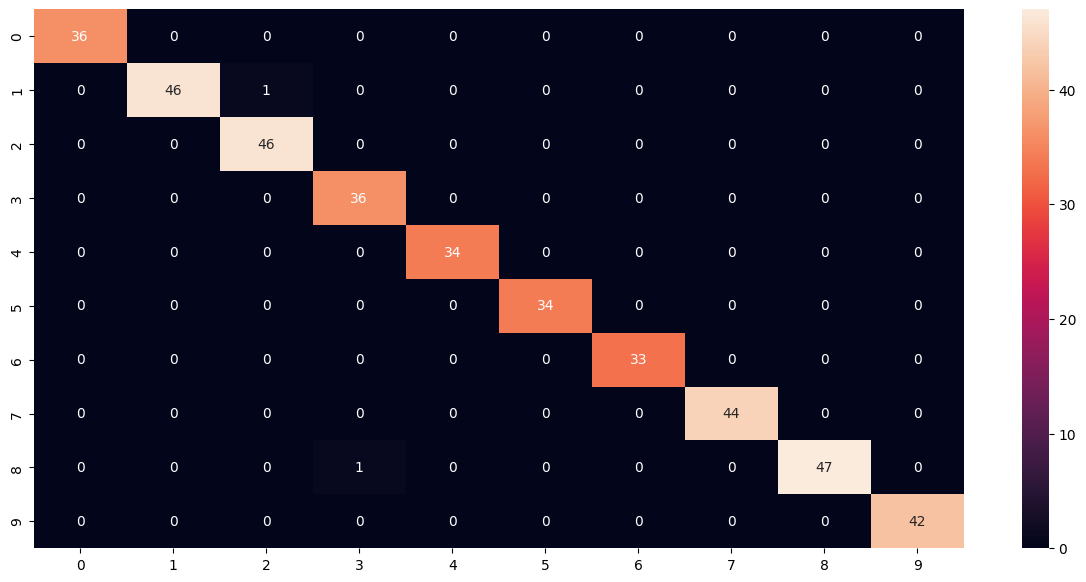

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(cm, annot=True)
plt.show()

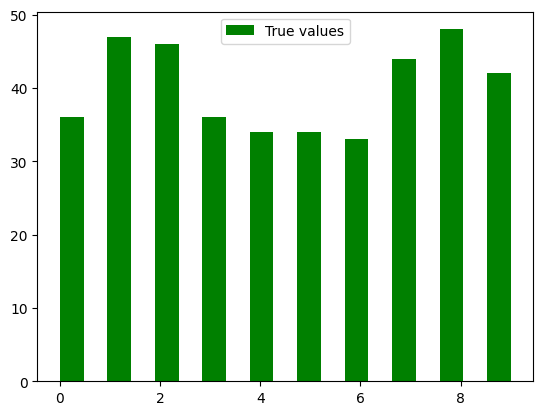

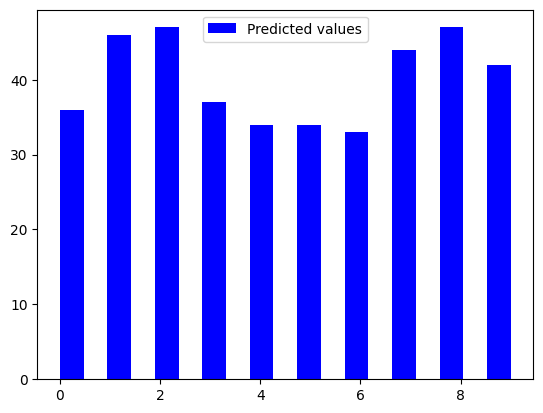

In [50]:
plt.hist(y_test,color="green",label=["True values"],bins=19)
plt.legend()
plt.show()
plt.hist(y_pred,color="blue",label=["Predicted values"],bins=19)
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.98      0.99        47
           2       0.98      1.00      0.99        46
           3       0.97      1.00      0.99        36
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        44
           8       1.00      0.98      0.99        48
           9       1.00      1.00      1.00        42

    accuracy                           0.99       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      0.99      1.00       400

